In [12]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

In [13]:
# Create a quantum circuit with two qubits
qr = QuantumRegister(2, 'q')
qc = QuantumCircuit(qr)

# Create the entangled state
qc.h(0)  # Apply Hadamard gate to the first qubit
qc.cx(0, 1)  # Apply CNOT gate with first qubit as control, second as target

# Measure both qubits
qc.measure_all()

Quantum circuit for creating an entangled state:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


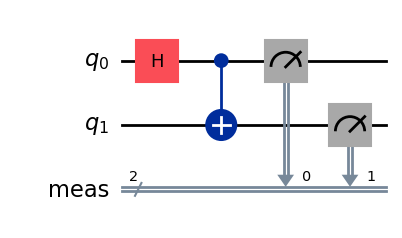

In [16]:
# Visualize the circuit
print("Quantum circuit for creating an entangled state:")
print(qc.draw())
qc.draw(output="mpl", plot_barriers=False)

In [18]:
# Run the circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
sampler = Sampler(mode=backend)
job = sampler.run([qc], shots=500)

Counts: {'11': 272, '00': 228}


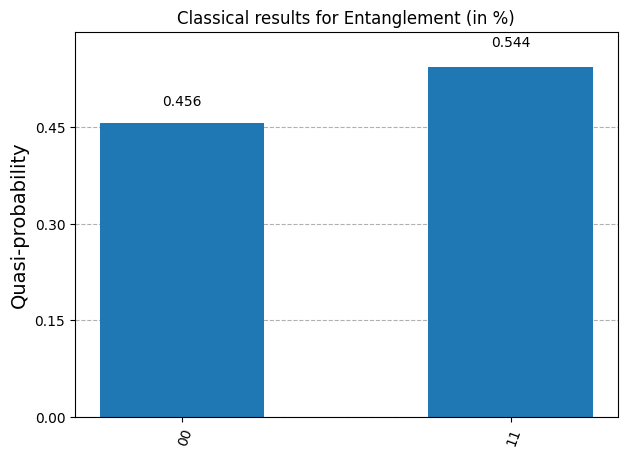

In [24]:
result = job.result()
dist = result[0].data.meas.get_counts()
print("Counts:", dist)
plot_distribution(dist, title="Classical results for Entanglement (in %)")